# **Data Visualization**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-05-04 17:23:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  15.9MB/s    in 9.9s    

2025-05-04 17:23:31 (15.4 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [ ]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [ ]:
QUERY = """
SELECT COUNT(*)
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [ ]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [ ]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


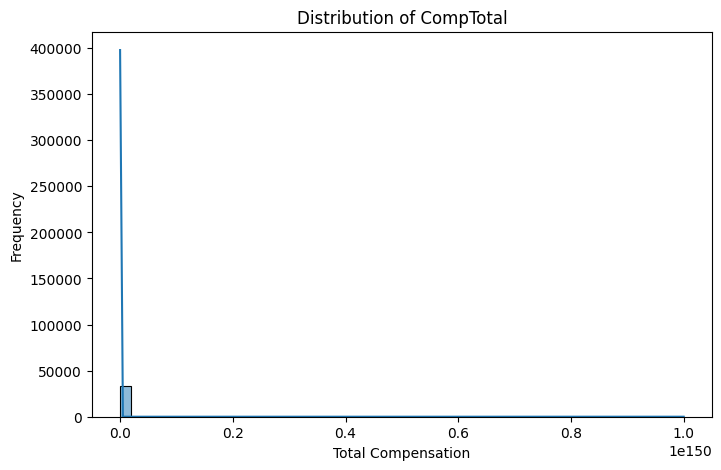

In [ ]:
## Write your code here
import seaborn as sns
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 5))
sns.histplot(df['CompTotal'].dropna(), bins=50, kde=True)
plt.title('Distribution of CompTotal')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


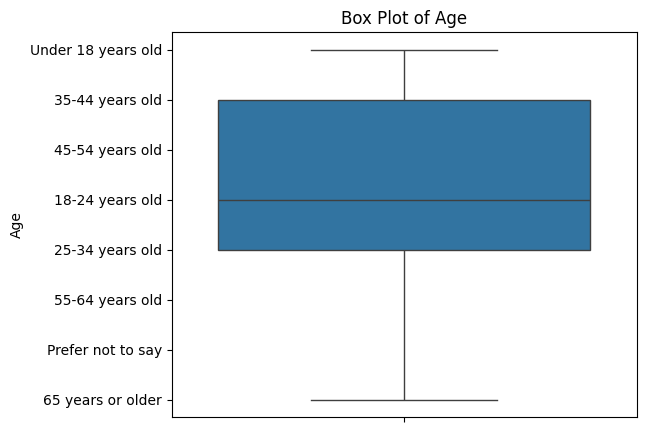

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)



plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Age'].dropna())
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


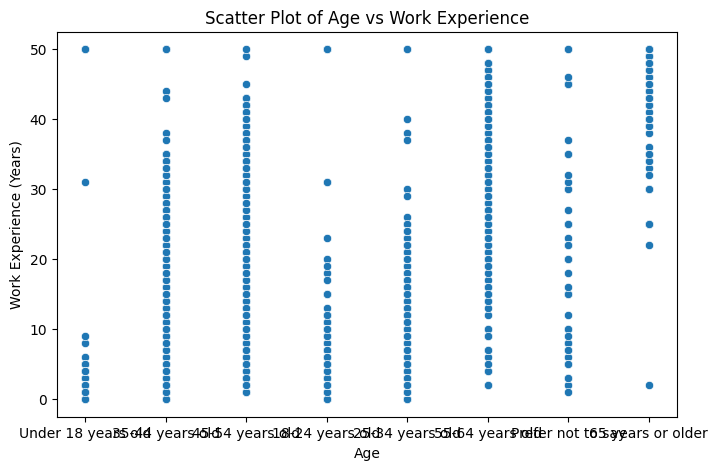

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='WorkExp')
plt.title('Scatter Plot of Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


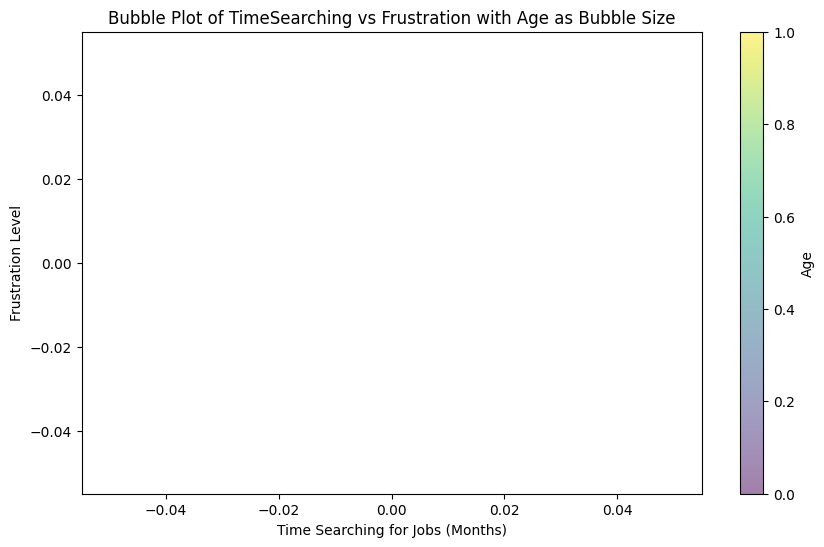

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df['TimeSearching'] = df['TimeSearching'].fillna(df['TimeSearching'].mode()[0])
df['Frustration'] = df['Frustration'].fillna(df['Frustration'].mode()[0])

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Frustration'] = pd.to_numeric(df['Frustration'], errors='coerce')

df = df.dropna(subset=['Age', 'TimeSearching', 'Frustration'])

plt.figure(figsize=(10, 6))
plt.scatter(
    x=df['TimeSearching'],
    y=df['Frustration'],
    s=df['Age'] * 10,       # Scale bubble size
    alpha=0.5,
    c=df['Age'],            # Color by Age
    cmap='viridis'
)
plt.title('Bubble Plot of TimeSearching vs Frustration with Age as Bubble Size')
plt.xlabel('Time Searching for Jobs (Months)')
plt.ylabel('Frustration Level')
plt.colorbar(label='Age')
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


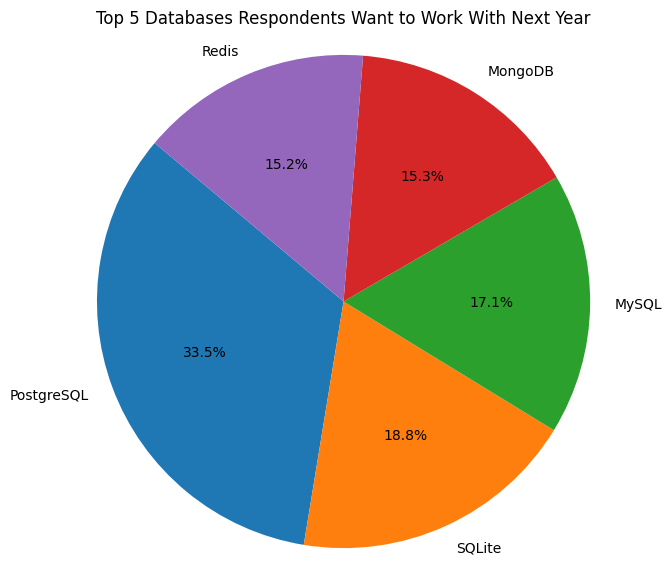

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].dropna()

all_dbs = df['DatabaseWantToWorkWith'].str.split(';').explode()
top_5 = all_dbs.value_counts().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Want to Work With Next Year')
plt.axis('equal')
plt.show()

**Stacked Charts**

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


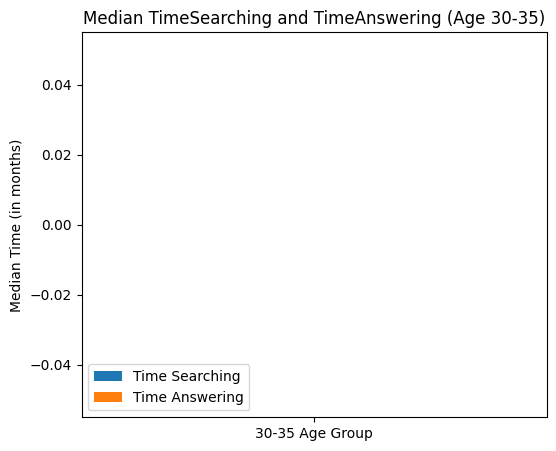

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['TimeAnswering'] = pd.to_numeric(df['TimeAnswering'], errors='coerce')

age_filtered = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

median_searching = age_filtered['TimeSearching'].median()
median_answering = age_filtered['TimeAnswering'].median()

categories = ['30-35 Age Group']
searching = [median_searching]
answering = [median_answering]

plt.figure(figsize=(6, 5))
plt.bar(categories, searching, label='Time Searching')
plt.bar(categories, answering, bottom=searching, label='Time Answering')

plt.ylabel('Median Time (in months)')
plt.title('Median TimeSearching and TimeAnswering (Age 30-35)')
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


IndexError: index 0 is out of bounds for axis 0 with size 0

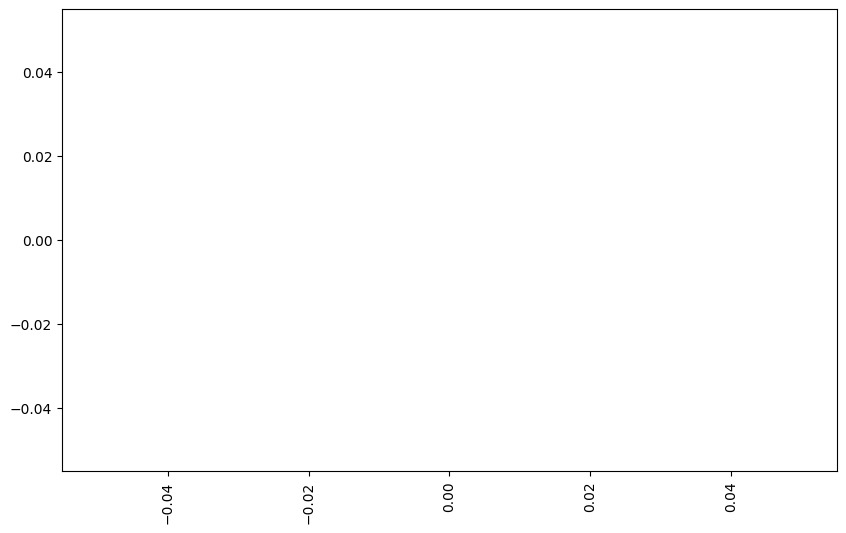

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

df_filtered = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

median_comp_by_age = df_filtered.groupby('Age')['CompTotal'].median().dropna()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
median_comp_by_age.plot(kind='bar', color='skyblue')
plt.title('Median Compensation (CompTotal) for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


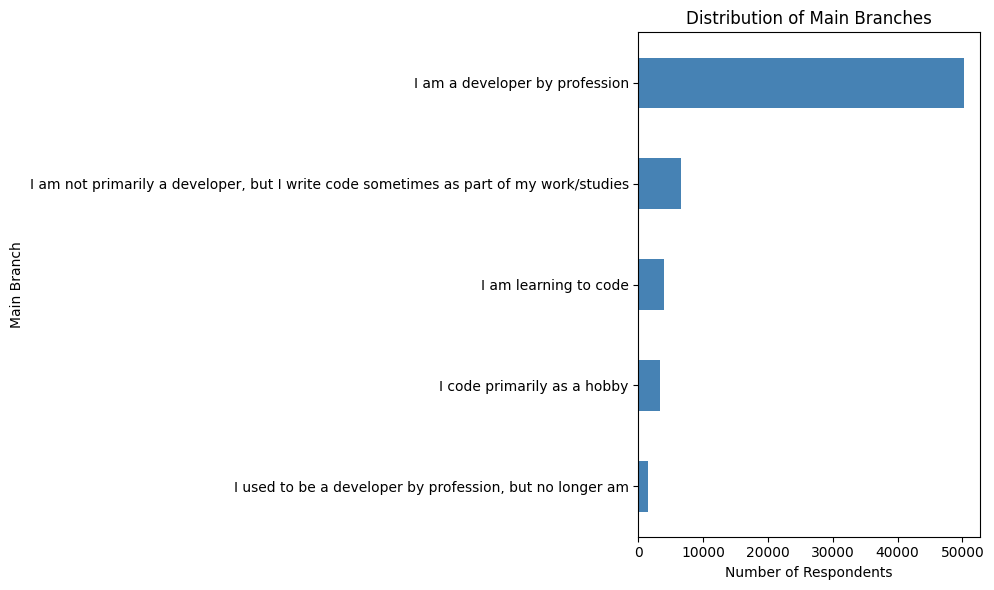

In [ ]:
## Write your code here
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

mainbranch_counts = df['MainBranch'].value_counts().sort_values()

plt.figure(figsize=(10, 6))
mainbranch_counts.plot(kind='barh', color='steelblue')
plt.title('Distribution of Main Branches')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.tight_layout()
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()